In [65]:
reset -f

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from numba import jit
import pandas as pd
import mio
from shapely.geometry import Polygon, Point, LineString
import geopandas as gpd
import random

In [67]:
# https://stackoverflow.com/questions/2049582/how-to-determine-if-a-point-is-in-a-2d-triangle
def bary(px, py, p0x, p0y, p1x, p1y, p2x, p2y):
    Area = 0.5 *(-p1y*p2x + p0y*(-p1x + p2x) + p0x*(p1y - p2y) + p1x*p2y)
    s = 1/(2*Area)*(p0y*p2x - p0x*p2y + (p2y - p0y)*px + (p0x - p2x)*py)
    t = 1/(2*Area)*(p0x*p1y - p0y*p1x + (p0y - p1y)*px + (p1x - p0x)*py)
    u = 1 -s -t
    if s>=0 and t>=0 and u>=0:
        return True
    else:
        return False

<AxesSubplot:>

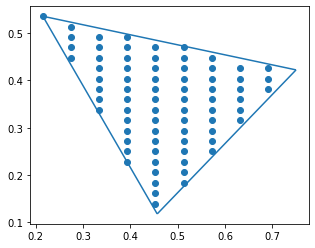

In [75]:
x1, y1 = random.random(),  random.random()
x2, y2 = random.random(),  random.random()
x3, y3 = random.random(),  random.random()

xmin, xmax = min([x1, x2, x3]), max([x1, x2, x3])
ymin, ymax = min([y1, y2, y3]), max([y1, y2, y3])

geoms = []
l1 = LineString([(x1, y1), (x2, y2)])
l2 = LineString([(x2, y2), (x3, y3)])
l3 = LineString([(x3, y3), (x1, y1)])
geoms.extend([l1, l2, l3])
for y in np.linspace(ymin, ymax, 20):
    for x in np.linspace(xmin, xmax, 10):
        r = bary(x, y, x1, y1, x2, y2, x3, y3)
        p = Point((x, y))
        if r:
            geoms.append(p)
gpd.GeoDataFrame(geometry=geoms).plot()